# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
import requests

# Set your API key
api_key = "28828620b43e210496b82dd79fada7ca"

# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
    
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred: {e}")
        print("City not found. Skipping...")

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | turpan
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | nogliki
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | laojunmiao
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | maksatikha
Processing Record 19 of Set 1 | whyalla stuart
City not found. Skipping...
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | stanley
Processing Record 22 of

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,300.67,82,100,2.59,PG,1714760960
1,waitangi,-43.9535,-176.5597,282.49,82,91,3.58,NZ,1714760960
2,turpan,42.9333,89.1667,297.45,12,76,0.77,CN,1714760960
3,kingston,17.9970,-76.7936,303.68,70,40,8.23,JM,1714760753
4,nogliki,51.8333,143.1667,271.67,92,26,3.13,RU,1714760960


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,300.67,82,100,2.59,PG,1714760960
1,waitangi,-43.9535,-176.5597,282.49,82,91,3.58,NZ,1714760960
2,turpan,42.9333,89.1667,297.45,12,76,0.77,CN,1714760960
3,kingston,17.9970,-76.7936,303.68,70,40,8.23,JM,1714760753
4,nogliki,51.8333,143.1667,271.67,92,26,3.13,RU,1714760960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

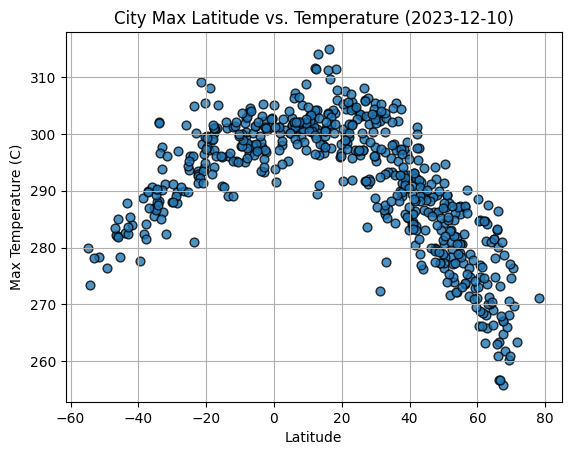

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Max Temp',
                  ylabel='Max Temperature (C)',
                  title='City Max Latitude vs. Temperature (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

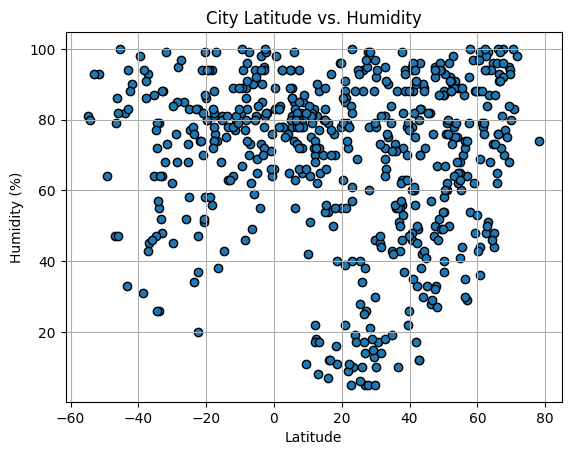

In [14]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

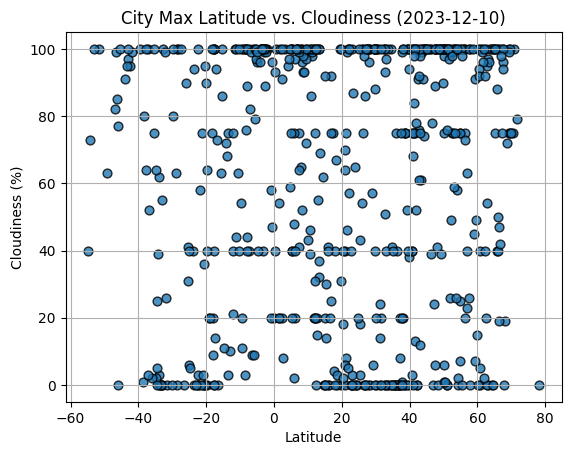

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',
                  x='Lat',
                  xlabel='Latitude',
                  y='Cloudiness',
                  ylabel='Cloudiness (%)',
                  title='City Max Latitude vs. Cloudiness (2023-12-10)',
                  grid=True,
                  s=40,
                  alpha=0.8,
                  edgecolor='k'
                  )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

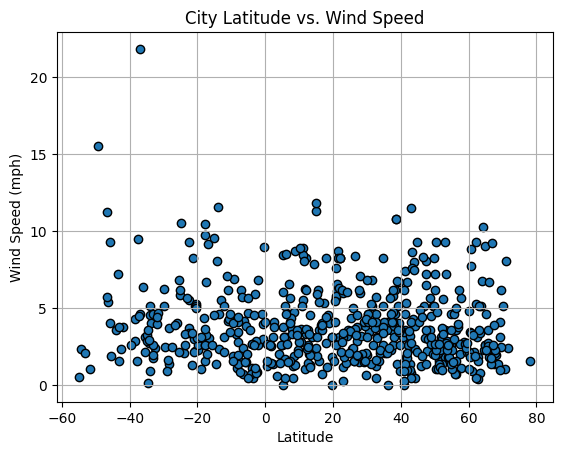

In [16]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    """Create a linear regression plot
    
    Parameters:
    x_values (Series): The x-axis data (e.g., latitude)
    y_values (Series): The y-axis data (e.g., temperature, humidity, cloudiness, wind speed)
    title (str): The title of the plot
    text_coordinates (Tuple[float, float]): The coordinates to place the regression equation on the plot
    
    Returns:
    None
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate linear regression equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"{title} vs. Latitude Linear Regression")
    
    # Print r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,turpan,42.9333,89.1667,297.45,12,76,0.77,CN,1714760960
3,kingston,17.9970,-76.7936,303.68,70,40,8.23,JM,1714760753
4,nogliki,51.8333,143.1667,271.67,92,26,3.13,RU,1714760960
5,qaqortoq,60.7167,-46.0333,276.90,44,0,8.84,GL,1714760958
6,tura,25.5198,90.2201,296.29,40,3,2.35,IN,1714760961


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,300.67,82,100,2.59,PG,1714760960
1,waitangi,-43.9535,-176.5597,282.49,82,91,3.58,NZ,1714760960
8,ushuaia,-54.8000,-68.3000,279.94,81,40,0.51,AR,1714760675
10,edinburgh of the seven seas,-37.0676,-12.3116,289.95,93,100,21.84,SH,1714760961
16,karratha,-20.7377,116.8463,296.51,51,0,2.23,AU,1714760962


###  Temperature vs. Latitude Linear Regression Plot

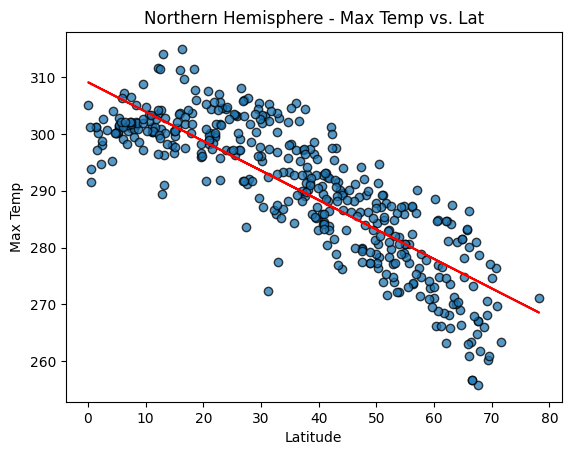

In [23]:
def generate_regression(df, x_column, y_column, output_image_file_name, xy_regression_label, hemisphere):
    """Perform linear regression on the given DataFrame and generate a scatter plot with a regression line.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    x_column (str): The name of the column representing the x-axis values.
    y_column (str): The name of the column representing the y-axis values.
    output_image_file_name (str): The name of the output image file (without extension).
    xy_regression_label (Tuple[float, float]): The coordinates to place the regression equation on the plot.
    hemisphere (str): The hemisphere (e.g., 'Northern Hemisphere', 'Southern Hemisphere').

    Returns:
    None
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_column], df[y_column])
    
    # Calculate regression values
    regression_values = slope * df[x_column] + intercept
    
    # Create scatter plot
    plt.scatter(df[x_column], df[y_column], alpha=0.75, edgecolors="k")

    # Plot regression line
    plt.plot(df[x_column], regression_values, color="red")

    # Annotate linear regression equation
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}\nR² = {round(r_value**2, 2)}', xy=xy_regression_label, fontsize=12, color="red")

    # Label plot
    plt.title(f'{hemisphere} - {y_column} vs. {x_column}')
    plt.xlabel('Latitude')
    plt.ylabel(y_column)

    # Save the figure
    plt.savefig(f'output_data/{output_image_file_name}.png')

    # Show plot
    plt.show()
# Call the generate_regression function
generate_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Fig5', (5, -30), 'Northern Hemisphere')

# Display the plot
plt.show()



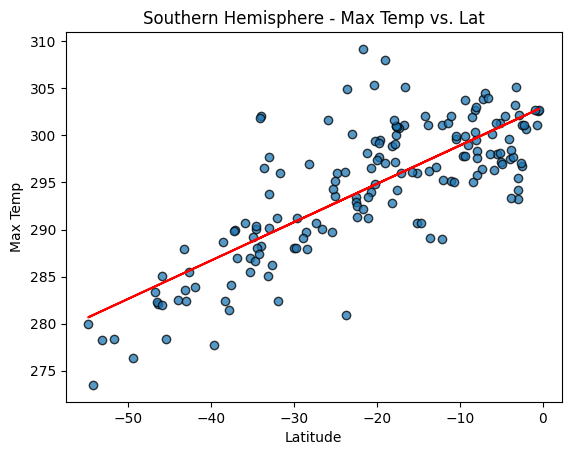

In [24]:
# Linear regression on Southern Hemisphere
output_image_file_name = 'Fig6'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-30,5)
generate_regression(southern_hemi_df, 'Lat', 'Max Temp',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** The data shows a correlation between the latitude and temperature in the northern and southern hemisphere. This makes sense, as distance from the equator affects temperature levels, with warmer temperatures closer to the equator and colder temperatures further away from it. 

### Humidity vs. Latitude Linear Regression Plot

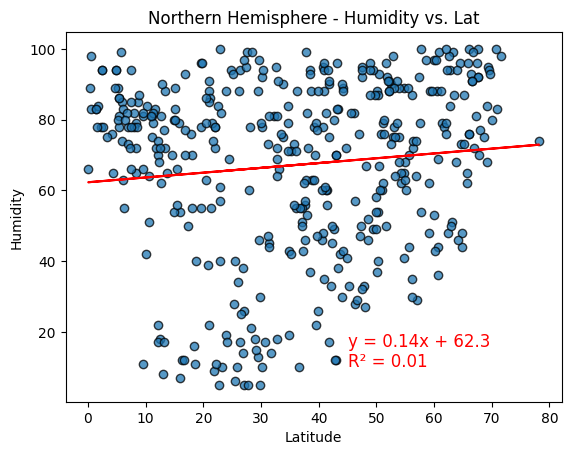

In [25]:
# Northern Hemisphere
output_image_file_name = 'Fig7'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (45,10)
generate_regression(northern_hemi_df, 'Lat', 'Humidity',output_image_file_name,xy_regression_label, hemisphere)

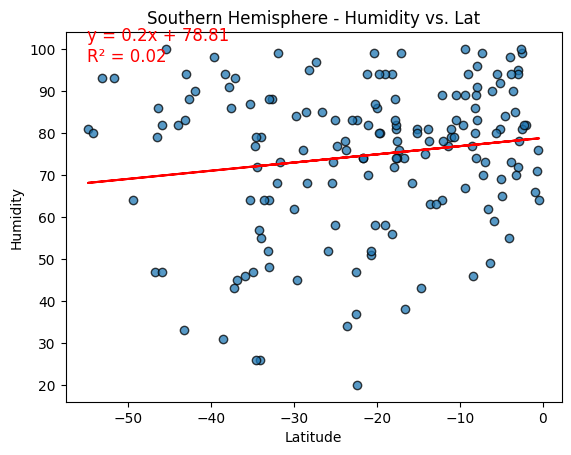

In [26]:
# Southern Hemisphere
output_image_file_name = 'Fig8'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-55,97)
generate_regression(southern_hemi_df, 'Lat', 'Humidity',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** Both the northern and southern hempishere data show a slightly positive relationshi between latitue and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

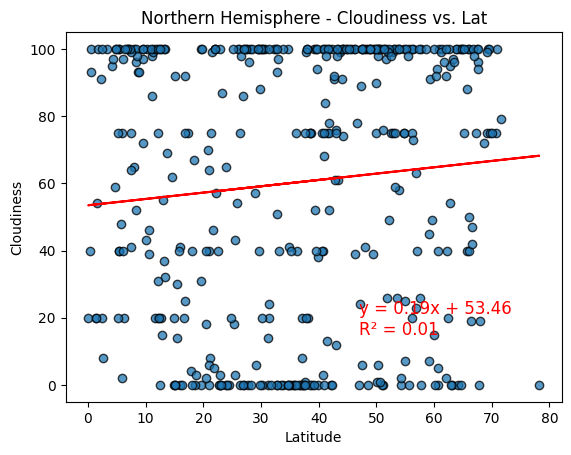

In [27]:
# Northern Hemisphere
output_image_file_name = 'Fig9'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (47,15)
generate_regression(northern_hemi_df, 'Lat', 'Cloudiness',output_image_file_name,xy_regression_label, hemisphere)

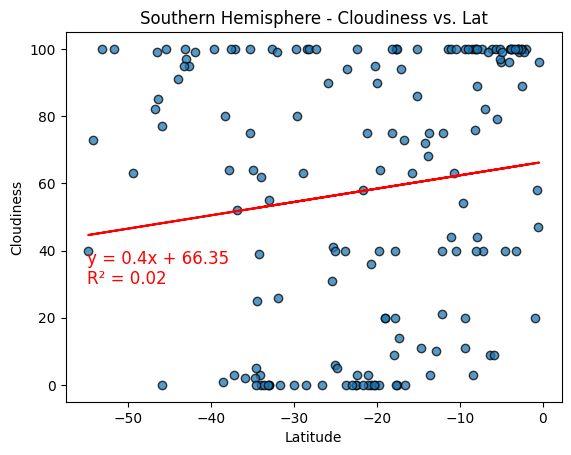

In [28]:
# Southern Hemisphere
output_image_file_name = 'Fig10'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-55,30)
generate_regression(southern_hemi_df, 'Lat', 'Cloudiness',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** The relationship between the northern and southern hemispheres are incredibly similar, with slight positive trends in both.

### Wind Speed vs. Latitude Linear Regression Plot

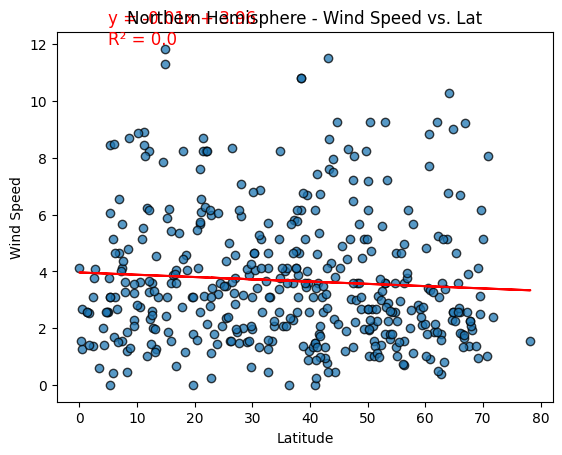

In [29]:
# Northern Hemisphere
output_image_file_name = 'Fig11'
hemisphere = 'Northern Hemisphere'
xy_regression_label = (5,12)
generate_regression(northern_hemi_df, 'Lat', 'Wind Speed',output_image_file_name,xy_regression_label, hemisphere)

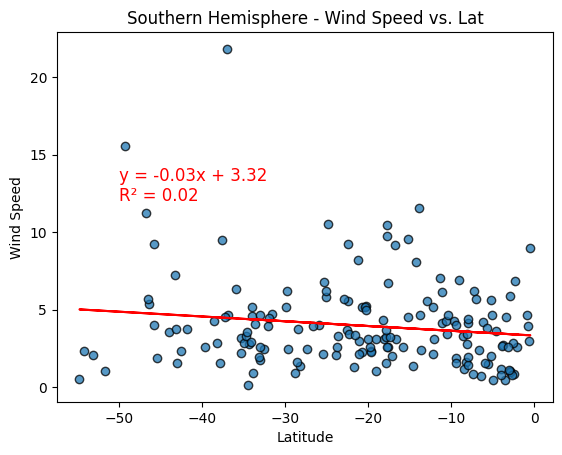

In [30]:
# Southern Hemisphere
output_image_file_name = 'Fig12'
hemisphere = 'Southern Hemisphere'
xy_regression_label = (-50,12)
generate_regression(southern_hemi_df, 'Lat', 'Wind Speed',output_image_file_name,xy_regression_label, hemisphere)

**Discussion about the linear relationship:** The relationships are relatively similar with both having slighly negative correlations. However, the r values are .1 off from each other.